[jd.1.0] min overlap 0.0
[jd.1.0] max overlap 26.666666666666668
[jd.1.0] mean overlap 0.6170258093037059
[jd.1.0] median overlap 0.0
[jd.1.0] std overlap 2.8990434711236643


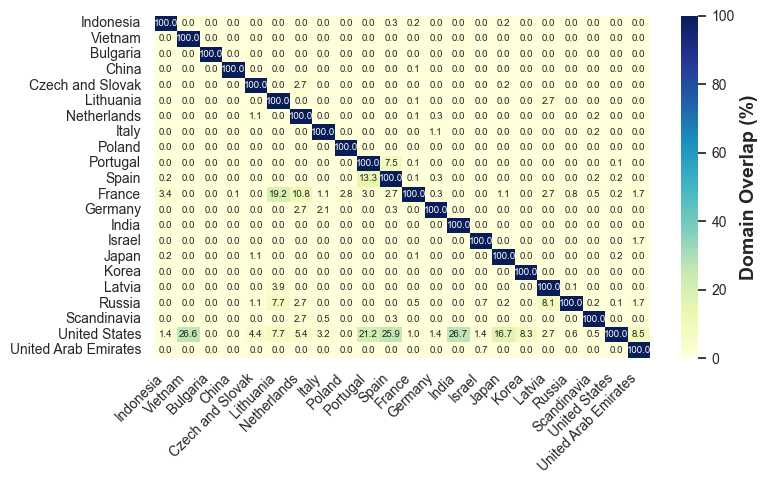

In [3]:

import os
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# from google.cloud import bigquery
# from scipy import stats
from glob import glob
import statistics

def map_names(name):
    names = {
    "ABPVN_List-justdomains.txt": "Vietnam",
    "Indian-justdomains.txt": "India",
    "ABPindo-justdomains.txt": "Indonesia",
    "Israel-justdomains.txt": "Israel",
    "Bulgarian_List-justdomains.txt": "Bulgaria",
    "Japanese-justdomains.txt": "Japan",
    "China-justdomains.txt": "China",
    "KoreanList-justdomains.txt": "Korea",
    "EasyList_Dutch-justdomains.txt": "Netherlands",
    "RU_AdList-justdomains.txt": "Russia",
    "EasyList_Italy-justdomains.txt": "Italy",
    "Scandinavia-justdomains.txt": "Scandinavia",
    "EasyList_Polish-justdomains.txt": "Poland",
    "USA-justdomains.txt": "United States",
    "EasyList_Portuguese-justdomains.txt": "Portugal",
    "VAE-justdomains.txt": "United Arab Emirates",
    "EasyList_Spanish-justdomains.txt": "Spain",
    "easylistczechandslovak-justdomains.txt": "Czech and Slovak",
    "France-justdomains.txt": "France",
    "easylistlithuania-justdomains.txt": "Lithuania",
    "Germany-justdomains.txt": "Germany",
    "latvian-list-justdomains.txt": "Latvia"
}
    return names.get(name, name)


def load_just_domain_lists(path=os.path.join(os.getcwd(), 'justdomains_analysis', 'justdomains', 'all_lists', 'lists')):
    files = glob(path + '/*.txt')

    domain_blocklists = dict()
    for file in files:
        filename = os.path.basename(file)
        with open(file, 'r') as f:
            data = f.read().splitlines()
        domain_blocklists[filename] = data

    return domain_blocklists


def analyse_lists(blocking_lists):
    distance_matrix = dict()
    overlap_values = list()

    # Compute pairwise percentual intersections
    for blocking_list, domains in blocking_lists.items():
        filterlist = map_names(blocking_list) #.replace('-justdomains.txt', '')
        domain_set_comparer = set(domains)

        distance_matrix[filterlist] = dict()
        for _blocking_list_name, _domains in blocking_lists.items():
            _domain_set_other = set(_domains)
            _filterlist_country = map_names(_blocking_list_name) #.replace('-justdomains.txt', '')

            intersec = domain_set_comparer.intersection(_domain_set_other)
            intersec_perc = len(intersec)/len(domain_set_comparer)*100
            distance_matrix[filterlist][_filterlist_country] = round(intersec_perc, 2)
            if intersec_perc != 100:
                overlap_values.append(intersec_perc)

    print("[jd.1.0] min overlap", min(overlap_values))
    print("[jd.1.0] max overlap", max(overlap_values))
    print("[jd.1.0] mean overlap", statistics.mean(overlap_values))
    print("[jd.1.0] median overlap", statistics.median(overlap_values))
    print("[jd.1.0] std overlap", statistics.stdev(overlap_values))

    # Plot heatmap of intersections
    df = pd.DataFrame(distance_matrix)

    # Plot adjustments
    matplotlib.rcParams['pdf.fonttype'] = 42
    matplotlib.rcParams['ps.fonttype'] = 42
    matplotlib.rcParams['text.usetex'] = False
    matplotlib.rcParams['axes.labelweight'] = 'bold'

    sns.set(rc={'figure.figsize': (8, 5), "ytick.labelsize": 8, "axes.titlesize": 14, "axes.labelsize": 14,
               "legend.fontsize": 18, "xtick.labelsize": 10, "ytick.labelsize": 10}, style="white")

    sns.heatmap(df, annot=True, cmap='YlGnBu', fmt=".1f", cbar_kws={"label": "Domain Overlap (%)"}, annot_kws={'size':7})
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    #plt.savefig(os.path.join(os.getcwd(), 'plots', "p99_overlap_domains_lists.pdf"), dpi=600,
     #            transparent=False, bbox_inches='tight', format="pdf")


if __name__ == '__main__':
    blocking_lists = load_just_domain_lists()
    analyse_lists(blocking_lists)
